In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

C:\Users\3lett\AppData\Local\Temp\ipykernel_3876\3624788073.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [42]:
# df1 = pd.read_excel("Data/statistic_id785203_students-with-federal-loans-for-higher-education-us-2023-by-repayment-status.xlsx", sheet_name='Data', skiprows=4, usecols=['Unnamed: 1', 'Unnamed: 2'])
# df1.rename(columns={'Unnamed: 1': 'type', 'Unnamed: 2': 'in percent'}, inplace=True)
# df1

จะเห็นได้จากข้อมูลนี้ว่า default rate(หนี้สูญ) = 15% 

In [43]:
# df2 = pd.read_excel("Data/statistic_id1078714_number-of-student-loan-borrowers-by-balance-us-2023.xlsx", sheet_name='Data', skiprows=4, usecols=['Unnamed: 1', 'Unnamed: 2'])
# df2.rename(columns={'Unnamed: 1': 'range', 'Unnamed: 2': 'loaner in million'}, inplace=True)
# df2

In [44]:
# df3 = pd.read_excel('Data/student loan in capital.xlsx', sheet_name='Data', skiprows=4, usecols=['Unnamed: 1', 'Unnamed: 2'])
# df3.rename(columns={'Unnamed: 1': 'range', 'Unnamed: 2': 'total loaned in billion u.s. dollar'}, inplace=True)
# df3

# Part 6: สาเหตุที่อาจเป็นเหตุให้เกิดการไม่จ่ายหนี้ กยศ
---


## 1. สถานะของผู้กู้ยืม

In [45]:
df1 = pd.read_excel('https://github.com/purachai-phonwisut/student-loan-analysis/raw/main/Data/%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99%E0%B8%9C%E0%B8%B9%E0%B9%89%E0%B8%81%E0%B8%B9%E0%B9%89%E0%B8%A2%E0%B8%B7%E0%B8%A1%E0%B9%81%E0%B8%A2%E0%B8%81%E0%B8%95%E0%B8%B2%E0%B8%A1%E0%B8%AA%E0%B8%96%E0%B8%B2%E0%B8%99%E0%B8%B0.xlsx')
df1

,ลำดับสถานะ,สถานะผู้กู้ยืม,จำนวนผู้กู้ยืม(รายบัญชี),จำนวนเงินกู้ยืม(บาท),จำนวนเงินต้นผิดนัดชำระหนี้(บาท)
0,10,1.อยู่ระหว่างศึกษา ปลอดหนี้,1366838,1.432988e+11,0.000000e+00
1,20,2.อยู่ระหว่างชำระหนี้,3519163,4.518960e+11,9.736006e+10
2,21,2.1ไม่ผิดนัดชำระหนี้,1277319,1.889971e+11,0.000000e+00
3,22,2.2ผิดนัดชำระหนี้,2241844,2.628990e+11,9.736006e+10
4,30,3.ชำระหนี้เสร็จสิ้น,1848558,1.457144e+11,0.000000e+00
5,40,4.เสียชีวิต ทุพพลภาพ,72270,6.391653e+09,0.000000e+00


In [46]:
df1['อัตราส่วนของผู้กู้แต่ละสถานะ'] = (df1['จำนวนเงินกู้ยืม(บาท)'] / df1['จำนวนเงินกู้ยืม(บาท)'].sum()) * 100
df1['อัตราส่วนของผู้กู้แต่ละสถานะ'] = df1['อัตราส่วนของผู้กู้แต่ละสถานะ'].map(lambda x: "{:.2f}".format(x)).astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ลำดับสถานะ                       6 non-null      int64  
 1   สถานะผู้กู้ยืม                   6 non-null      object 
 2   จำนวนผู้กู้ยืม(รายบัญชี)         6 non-null      int64  
 3   จำนวนเงินกู้ยืม(บาท)             6 non-null      float64
 4   จำนวนเงินต้นผิดนัดชำระหนี้(บาท)  6 non-null      float64
 5   อัตราส่วนของผู้กู้แต่ละสถานะ     6 non-null      float64
dtypes: float64(3), int64(2), object(1)
memory usage: 420.0+ bytes


[Text(0, 0, '11.95'),
 Text(0, 0, '37.68'),
 Text(0, 0, '15.76'),
 Text(0, 0, '21.92'),
 Text(0, 0, '12.15'),
 Text(0, 0, '0.53')]

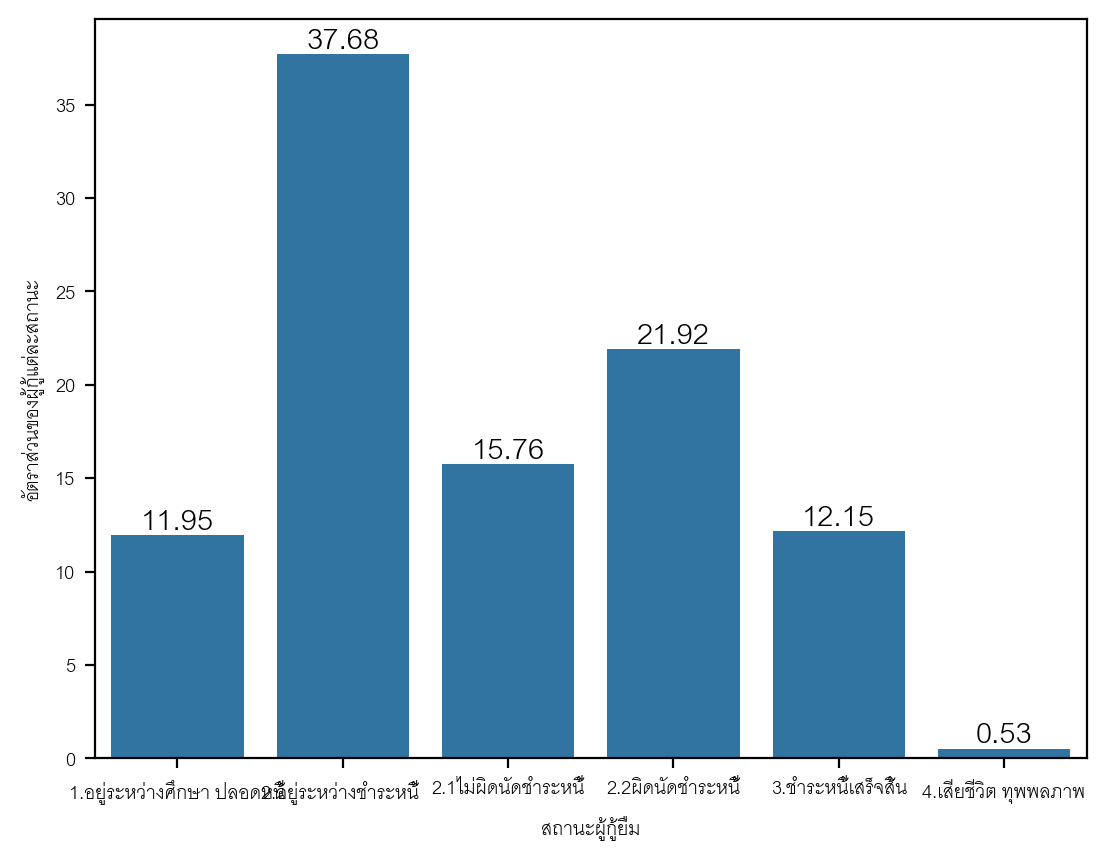

In [47]:
plt.rcParams['font.family'] = 'Cordia new'
g=sns.barplot(data=df1, y="อัตราส่วนของผู้กู้แต่ละสถานะ", x="สถานะผู้กู้ยืม");
g.bar_label(g.containers[0], fontsize=16)

## 6B

## กราฟแสดงจำนวนจำนวนคนที่อยู่ระหว่างการชำระหนี้ 

In [48]:
# read_csv dataframe
df2 = pd.read_csv('https://data.go.th/dataset/7d177ea4-058d-4562-b7ed-283509aeffed/resource/3aa051d7-b476-4c27-848a-55136f8cd688/download/xx.csv')

# rename column names for easier access
df2.rename(columns={'ปีงบประมาณ': 'Year', ' จำนวนผู้กู้ยืมที่อยู่ระหว่างชำระหนี้ ': 'Count', ' พบข้อมูลจากภาครัฐ ': 'ภาครัฐ', ' พบข้อมูลจากภาคเอกชน ': 'เอกชน'}, inplace=True)

# create a variable to prepare to convert objects to float
cols_to_clean = ['Count', 'ภาครัฐ', 'เอกชน']
df2[cols_to_clean] = df2[cols_to_clean].apply(lambda x: x.str.replace(',', ''))
df2[cols_to_clean] = df2[cols_to_clean].astype(float)

# use apply and lambda to create a new column that accounts for missing people outside of ภาครัฐ and เอกชน
df2['ไม่สังกัดหน่วยงาน'] = df2.apply(lambda x: x['Count'] - (x['ภาครัฐ']+x['เอกชน']), axis=1)

# change to long format
melt_df2 = df2.melt(id_vars=['Year'], var_name='Category', value_name='Value')

# Sort_value
Tidy_df2 = melt_df2.sort_values('Year').reset_index()
Tidy_df2.drop('index', axis=1, inplace=True)

<Axes: xlabel='Year', ylabel='Value'>

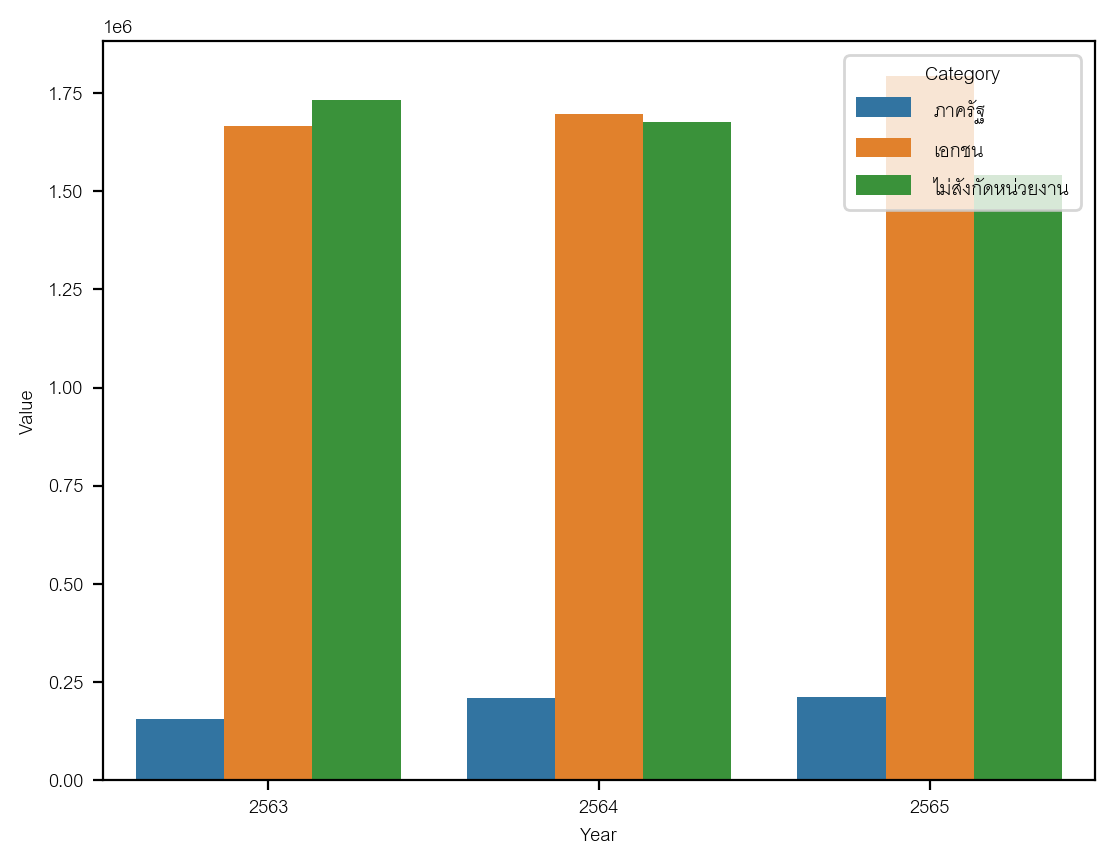

In [49]:
df_filtered = Tidy_df2[Tidy_df2['Category'] != 'Count']

plt.rcParams['font.family'] = 'Cordia new'
sns.barplot(data=df_filtered, x='Year',y='Value', hue='Category')

เดี๋ยวกลับมา highlight ตอนนี้ยังทำไม่เป็น จริงๆ ทำเป็นมีงานทำกับไม่มีงานทำก็ดีเหมือนกันนะ

จะเห็นได้จากกราฟว่ามีคนที่จบการศึกษาแล้วไม่มีงานทำอยู่จำนวนมาก บางปีคิดเป็น ...%ของคนที่มีงานแล้วเลย(สูงสุด)

In [50]:
df2['มีงานทำ'] = df2.apply(lambda x: x['ภาครัฐ'] + x['เอกชน'], axis=1)
df2.rename(columns={'ไม่สังกัดหน่วยงาน': 'ไม่มีงานทำ'}, inplace=True)
df3 = df2[['Year', 'ไม่มีงานทำ', 'มีงานทำ']].copy()
melt_df3 = df3.melt(id_vars=['Year'], value_vars=['ไม่มีงานทำ', 'มีงานทำ'])


<Axes: xlabel='Year', ylabel='value'>

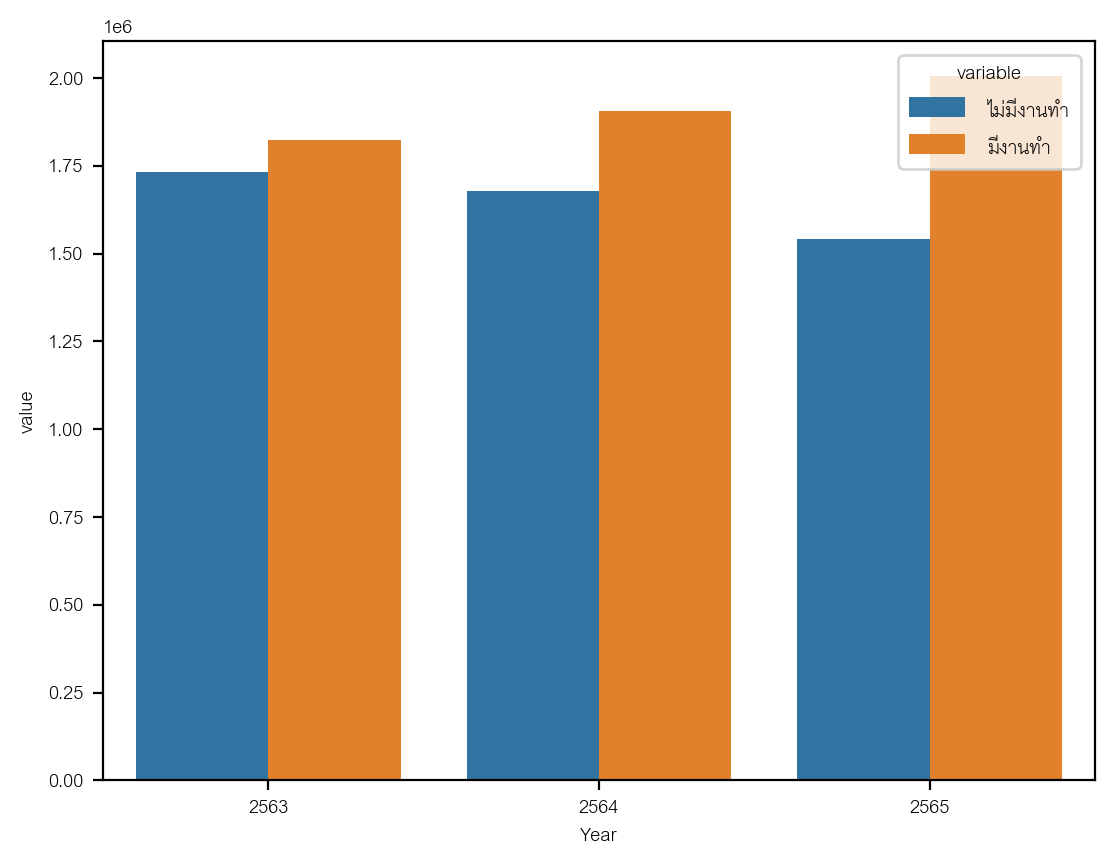

In [51]:
sns.barplot(data=melt_df3, x='Year', y='value', hue='variable')

## 6C

## 6D

ต่อไปเราจะมาดูอีกเหตุผลหนึ่ง เราสันนิษฐานว่าด้วยความที่ค่าดอกเบี้ยของหนี้กยศ.ต่ำ เพียงแค่ 1% ต่อปี คนที่ีหนี้สินอื่นนอกจากของกยศ.ก็จะไปชำระหนี้อื่นก่อนที่จะมาจ่ายหนี้กยศ.เนื่องจากก็เป็นธรรมชาติที่จะชำระหนี้ที่ดอกเบี้ยสูงกว่าหรือมีงวดชำระที่บ่อยกว่า

1. ควรจะหาอัตรส่วนหนี้นอกระบบต่อหนี้ทั้งหมด
2. ควรจะหาว่าหนี้ครัวเรือนขนาดนี้

In [26]:
# read data_dict and df1
data_dict = pd.read_csv('https://catalogapi.nso.go.th/api/datadic?table=SES_43_01&format=csv')
data_dict
df1 = pd.read_csv('https://catalogapi.nso.go.th/api/index?table=SES_43_01&format=csv')
df1

# analyse informal and formal loan
df1.drop(columns=['CODE_AREA', 'AREA', 'CODE_REGION'], inplace=True)
df2 = df1[['YEAR','REGION' , 'FORMALONLY', 'INFORMALONLY', 'FORMAL_INFORMAL']]

# คำนวณหาค่าของคนที่มีหนี้สินทั้งในและนอกระบบ ด้วยการเอาค่า union - intersect
df2['TRUE_FORMAL_INFORMAL'] = df2.apply(lambda x: x['FORMALONLY'] + x['INFORMALONLY'] - x['FORMAL_INFORMAL'], axis=1)

# drop 'FORMAL_INFORMAL' because of no more use.
df2.drop('FORMAL_INFORMAL', axis=1)

# คำนวณหาครัวเรือนทั้งหมดที่มีหนี้สิน
df2['Total_Debt'] = df2.apply(lambda x: x['FORMALONLY'] + x['INFORMALONLY'] + x['TRUE_FORMAL_INFORMAL'], axis=1)

# ใช้ groupby เพื่อหาผลบวกของ ทั้งปีและ Region
df2_clean = df2[['YEAR', 'REGION', 'Total_Debt']]
df2_clean.groupby(['YEAR']).sum()

C:\Users\3lett\AppData\Local\Temp\ipykernel_3876\3843788760.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TRUE_FORMAL_INFORMAL'] = df2.apply(lambda x: x['FORMALONLY'] + x['INFORMALONLY'] - x['FORMAL_INFORMAL'], axis=1)
C:\Users\3lett\AppData\Local\Temp\ipykernel_3876\3843788760.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Debt'] = df2.apply(lambda x: x['FORMALONLY'] + x['INFORMALONLY'] + x['TRUE_FORMAL_INFORMAL'], axis=1)


,REGION,Total_Debt
YEAR,,
2554,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,80680784
2556,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,81941534
2558,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,79105214
2560,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,81217855
2562,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,74912775
2564,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,88237494


# กูไปต่อไม่เป็นว่ะ ไม่รู้จะเอาไปเปรียบเทียบกับอะไรดี

## 6E

จากการหาข้อมูลว่าอะไรเป็นสิ่งที่ทำให้คนไทยไม่จ่ายหนี้กยศ.นอกจากเหตุผลเหล่านี้ก็มีเหตุผลของการที่โครงสร้างของหนี้กยศ.นั้นออกแบบมาได้อย่างไม่รอบคอบ
1. หนี้กยศ.เป็นหนี้รายปี - การจ่ายหนี้รายปีเป็นวันเดียวกันนั้น ถึงแม้จะสะดวกทางกยศ. แต่เนื่องจากสถานะทางเศรษฐกิจของผู้กู้ส่วนใหญ่ การเก็บเงินข้ามปีเพื่อจ่ายหนี้ นั้นเป็นเรื่องที่ไม่ง่ายเลย
2. เบี้ยปรับสูง - สำหรับหนี้ที่มีดอกเบี้ยเพียง 1% เบี้ยปรับอัตรา 18% ต่อปีนั้นเป็นเบี้ยปรับที่สูงมาก ผลที่กยศ.ต้องการนั่นคือการกระตุ้นให้ลูกหนี้จ่ายหนี้ ให้ผลตรงกันข้าม เมื่อเร็วๆ นี้จึงมีแผนการปรับโครงสร้างหนี้ใหม่
3. จ่ายหนี้ ตัดไม่ถึงเงินต้น - ต่อจากความที่เบี้ยปรับสูง การพลาดการจ่ายหนี้เพียงครั้งเดียวนั้นก็อาจจะทำให้มีปัญหาใหญ่ได้ เนื่องจากเหมือนกับหนี้ทั่วไปที่จะตัดดอกเบี้ยก่อนแล้วค่อยตัดเงินต้น หนี้กยศ.ก็เป็นหนี้ที่ตัดเบี้ยปรับก่อน แล้วค่อยดอกเบี้ย และค่อยเงินต้น ดังนั้นลูกหนี้ที่ผิดนัดชำระหนี้ก็อาจจะต้องจ่ายเบี้ยปรับและดอกเบี้ยไปตลอด เพราะตัดไม่ถึงเงินต้น ซึ่งในปัจจุบันได้มีโอกาศให้สามารถปรับโครงสร้างหนี้ให้ตัดเงินต้นก่อนได้
4. หนี้กยศ.เป็นหนี้ที่ไม่มีการต่อรอง - การกู้ยืมกยศ.ไม่มีการต่อรองใดๆ ทุกสัญญากู้เป็นแบบเดียวกันหมด และนั่นทำให้ไม่สามารถต่อรองสัญญากู้ยืมให้เหมาะกับผู้กู้ได้
5. ยอดที่ต้องจ่ายเพิ่มขึ้นเรื่อยๆ - ทุกๆ ปีหนี้ที่ต้องจ่ายจะเพิ่มขึ้นเรื่อยๆ เช่น งวดแรกจ่าย 1% ของเงินต้น แต่งวดที่ 10 ต้องจ่าย 10% ของเงินต้น ซึ่งไม่มีเหตุผลที่ต้องทำเช่นนั้นลย เนื่องจากก็จะยิ่งทำให้คนที่ฐานะการเงินไม่ดี จ่ายหนี้สินไม่ทัน

## 6F

แน่นอนว่าเราไม่สามารถตำหนิทางกยศ.ได้ทางเดียว ในเมื่อปัญหาทั้งหมดก็จะไม่เกิดขึ้นถ้าผู้กู้จ่ายหนี้คืนตามเวลา